# Project Team ID  :  "PTID-CDS-JUN-23-1562"

1) Elfy William       (elfywilliam@gmail.com)                                                                                   
                                                                                                                            
2) Kashif Ahmed       (kashifahmedm@gmail.com)                                                                              

3) Munawar Ali        (munawarali76753@gmail.com)

4) Sakshi Ganorkar    (sakshiganorkar53@gmail.com)

5) Shubham Joshi      (sajoshi20@gmail.com)

6) Vyankatesh Kongari (Vyankateshkongari12345@gmail.com)


# PRCP-1000-ProtugeseBank

## Problem Statement

Task 1:- Prepare a complete data analysis report on the given data.

Task 2:- Create a predictive model which will help the bank marketing team to know which customer will buy the product.

Task3:- Suggestions to the Bank market team to make  customers  buy the product.


## Objective: Increase the effectiveness of the bank's telemarketing campaign
* This project will enable the bank to develop a more granular understanding of its customer base, predict customers' response to its telemarketing campaign and establish a target customer profile for future marketing plans.

* By analyzing customer features, such as demographics and transaction history, the bank will be able to predict customer saving behaviours and identify which type of customers is more likely to make term deposits. The bank can then focus its marketing efforts on those customers. This will not only allow the bank to secure deposits more effectively but also increase customer satisfaction by reducing undesirable advertisements for certain customers.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
data=pd.read_csv('bank-additional-full.csv', sep=";")
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
data.shape

(41188, 21)

In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Domain Analysis :

* **Term deposit account**, also known as a fixed deposit account, is a type of fixed-term Investment. We can use this account to deposit money into a bank and earn interest on our deposits.
* The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.The classification goal is to predict if the client will subscribe to a term deposit (target variable).
* **We have to predict whether a customer avails term deposit or not**.
* We do some basic checks are as follows:

In [5]:
data.head(pd.set_option("display.max_columns",None))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
data.shape

(41188, 21)

In [7]:
data.info()
## There are 21 columns including target variable(y)
## There is no null values in dataset
## Data both in categorical and numerical format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548



### Attribute Information:
#### Input variables:

1) Age : First features is age of clients, this is numeric features in range between 18 and 95 yearsold. Between young customers, adults or retired customers they might have different interest in subscribing to the term deposit.

2) Job : The second is job, different job by the customers can influence their interest in subscribing to the term deposit.It is categorical in type.

3) Marital : Customers marital status whether they're single, married or divorced will affect their likeliness to subscribe. Single customers might subscribe for themselves while married customers will consider their family members too.

4) Education : Customers' difference education background might contribute to their interest in accepting & persuaded by the term deposit marketing.

5) Default : This feature is to indicate whether the customers has credit in default or not. 

6) Housing Loan : This is to indicate if the customers has a housing loan.

7) Loan : Similarly, this feature indicate whether the customers has personal loan or not.

8) Contact : How the marketing team contacted the customers either by cellular or telephone.

9) Month : This feature indicate when was the last month of the year that the team contacted the customers. 

10) Day of Week : Indicates when was the last day of the week of the customer contacted by the team. 

11) Duration : Last contact duration, in seconds (numeric).But this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12) Campaign : The number of contacts performed during the campaign period.

13) PDays : Indicates the number of days that has passed after the last call. 999 means that the customers was not previously contacted.

14) Previous : The number of contacts performed before this campaign & for this client.

15) Poutcome : What is the outcome of the previous marketing.

16) Emp.var.rate : Employment variation rate which is a quarterly indicator. 

17) Cons.price.idx : Consumer price index which is a monthly indicator.

18) Cons.conf.idx : Consumer confidence index which is a monthly indicator.
 
19) Euribor3m : Euribor 3 month rate which is a daily indicator based on the average interbank interest rates in Eurozone.

20) Nr.employed : Number of employees which is a quarterly indicator.                                                           


#### Output variable (target):

21) y : has the client subscribed a term deposit? (binary: 'yes','no')                                                                                              
.                                                                                                                                

                           
### Insights :

* The dataset is the banking dataset with **41188 datapoints and 21 feature** including target variable. 
* There is **no null values** in dataset
* **Most features were categorial in nature** hence we tried to convert categorical data into numerical so our model understand numerical data easily.
* The categorical variables are :  'job',  'marital', 'education', 'default', 'housing', 'loan', 'contact',  'month', 'day of week', 'poutcome'
* **The features like education, martial does impact the term deposit** as we saw that professionals with admin and blue collar jobs are more inclined towards accepting the term deposit.                         
* Also, customers who are married are more interested in accepting the term deposit.                                          
* By looking at education variables we can also see that customers with a higher educational degree are more educated in terms of understanding the policies and terms to accept the term deposit. 
* Furthermore, client whose job profession is admin have subcribed more to the bank deposit term. 
* **From all these analysis we came to a conclusion that material status and education has an impact towards term deposit.**

* we have predicted that **young people** are millennials that who are currently between 25 and 40 years old are tending towards acceptance of term deposits. These people are **highly educated** and **married**. They are also those individuals who are doing high level jobs such as blue collar jobs. As a typical portrait of a person x who is inclined towards term deposit is someone with a highest education level and married with a blue color job.

# Exploratory Data Analysis (EDA):

#### Analysis of data to discover relationships between measures in the data and to gain an insight on the trends, patterns, and relationships among various entities present in the data set.                                                                                                                            We doing here univariate, bivariate and multivariate analysis of different features as follows:

In [10]:
# Drop 'duration' column bec it highly affects the output target
data = data.drop('duration', axis=1)

In [11]:
## Renaming certain columns just to make analysis easy

data.rename(columns= {'pdays':'pass_days', 'housing':'housing_loan', 'loan':'personel_loan','previous':'pre_contact', 
                      'poutcome':'pre_outcome', 'emp.var.rate':'emp_var_rate', 'cons.price.idx':'cons_price_idx',
                      'cons.conf.idx':'cons_conf_idx','euribor3m':'euribor_3m', 'nr.employed':'no_employed', 
                      'y':'outcome'}, inplace=True )

In [12]:
data1 = data[["age", "campaign","pass_days", "pre_contact", "emp_var_rate", "cons_price_idx",
        "cons_conf_idx", "euribor_3m", "no_employed"]]

#data1 means numerical data

In [13]:
data2 = data[["job","marital", "education","default", "housing_loan", "personel_loan", "contact", "month", "day_of_week",
            "pre_outcome", "outcome"]]

#data2 means categorical data

In [14]:
data.head(1)

,age,job,marital,education,default,housing_loan,personel_loan,contact,month,day_of_week,campaign,pass_days,pre_contact,pre_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,no_employed,outcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
data1.head(1)

,age,campaign,pass_days,pre_contact,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,no_employed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [16]:
data2.head(1)

,job,marital,education,default,housing_loan,personel_loan,contact,month,day_of_week,pre_outcome,outcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no


#### Univariate analysis : Individual feature analysis

In [17]:
import sweetviz as sv
sv.analyze(data).show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Bivariate analysis : Checking relationship of all variables with respect to target variable

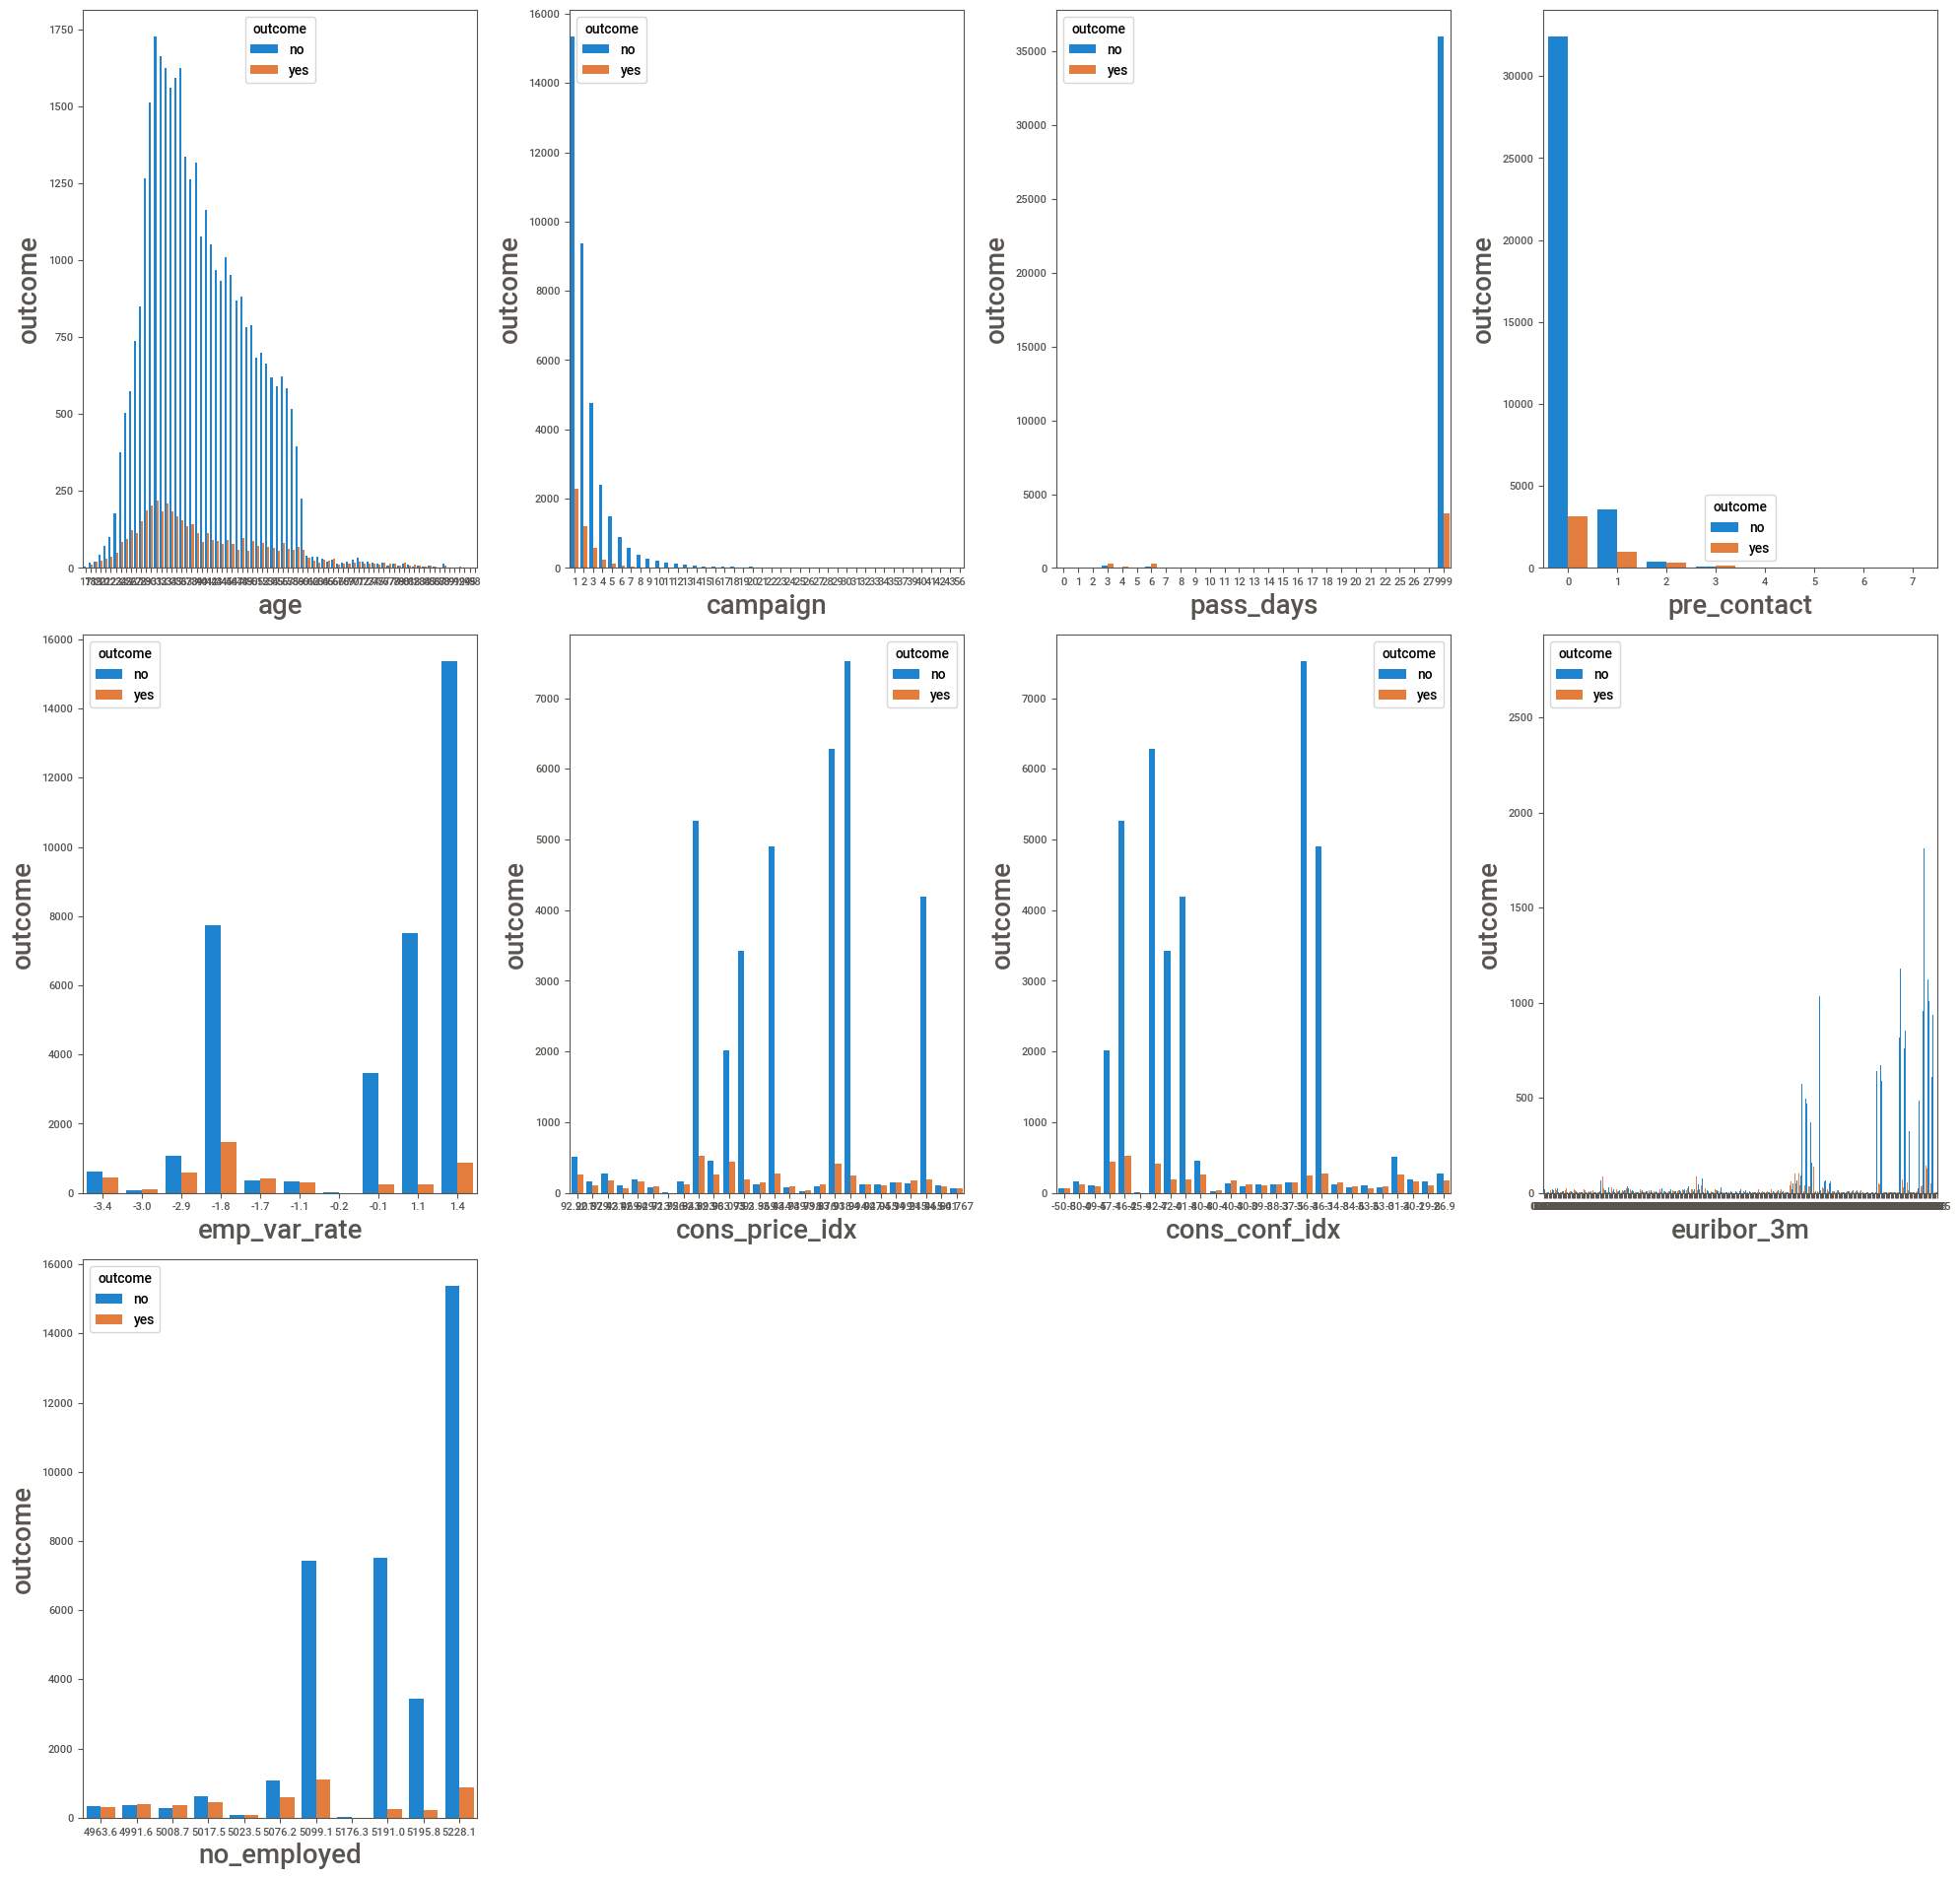

In [18]:
## Numerical data

plt.figure(figsize=(20,25)) 
plotnumber=1            
for column in data1:  
    plt.subplot(4,4,plotnumber)
    sns.countplot(x=data1[column], hue=data['outcome'])
    
    plt.xlabel(column,fontsize=20)
    plt.ylabel('outcome',fontsize=20)
    plotnumber+=1 
    
plt.tight_layout()      

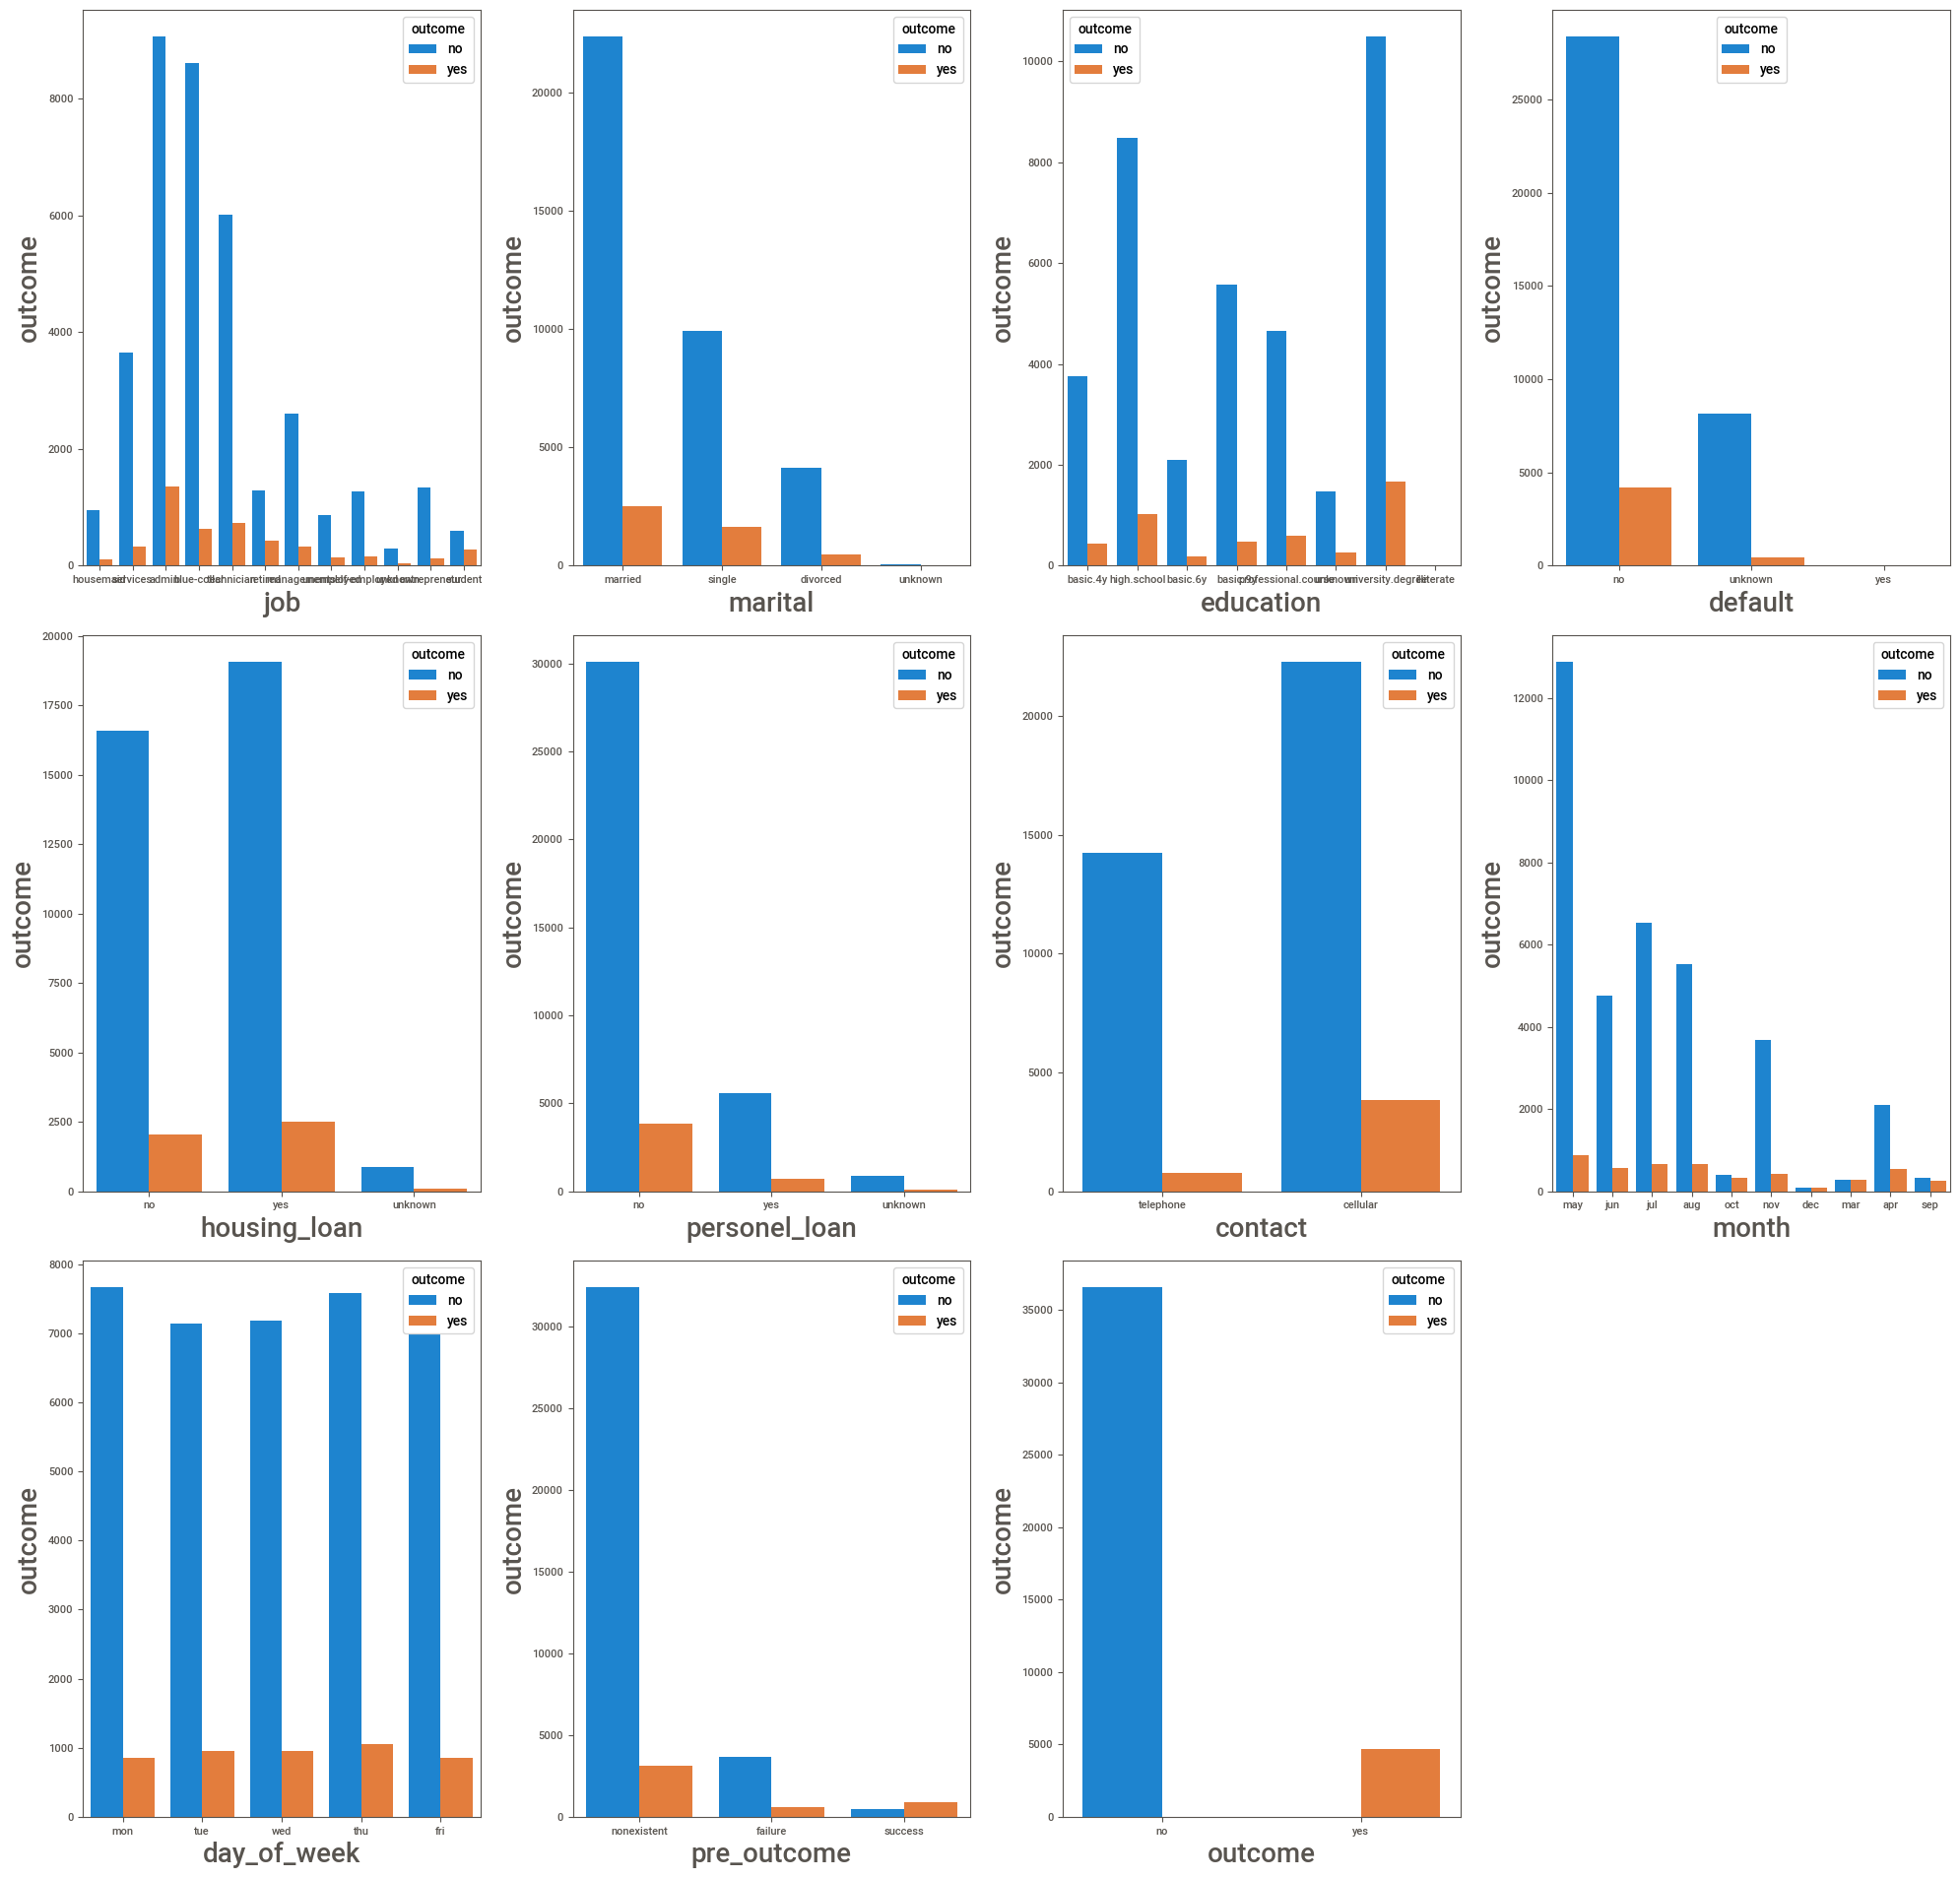

In [19]:
## categorical data

plt.figure(figsize=(20,25)) 
plotnumber=1            
for column in data2:  
    plt.subplot(4,4,plotnumber)
    sns.countplot(x=data2[column], hue=data['outcome'])
    
    plt.xlabel(column,fontsize=20)
    plt.ylabel('outcome',fontsize=20)
    plotnumber+=1
    
plt.tight_layout()      

#### Multivariate analysis: 

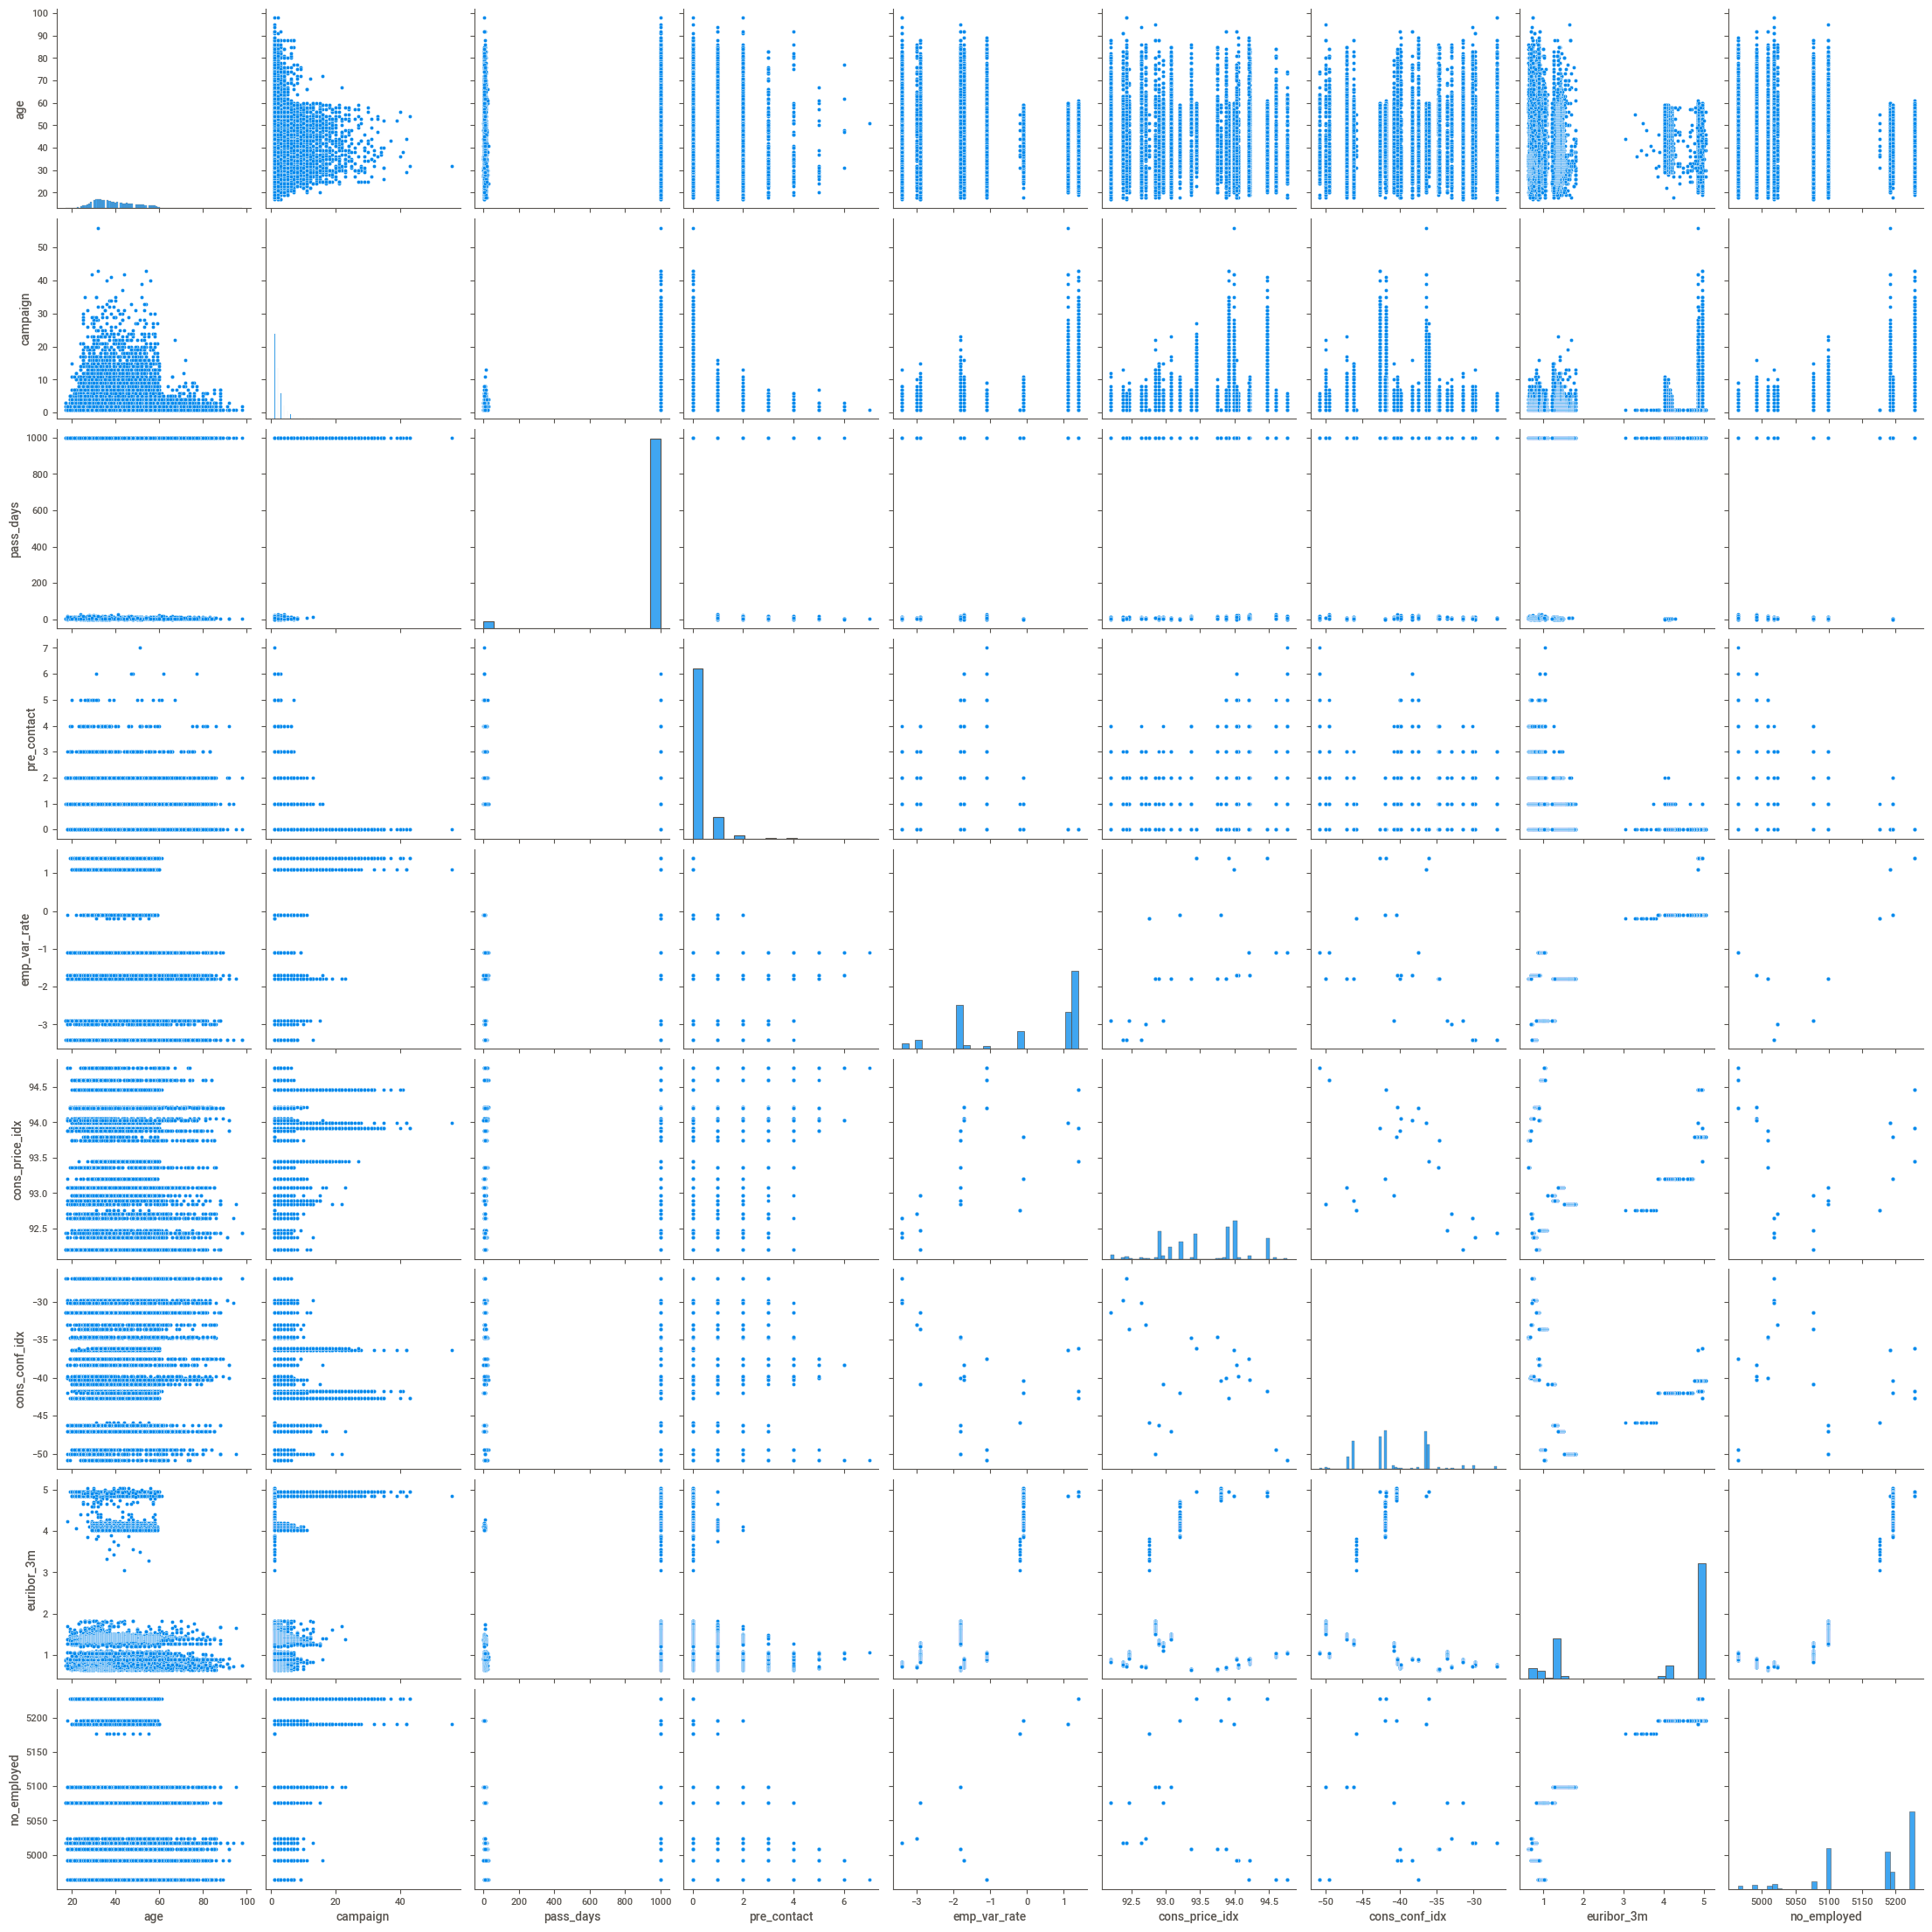

In [20]:
sns.pairplot(data)

<AxesSubplot:>

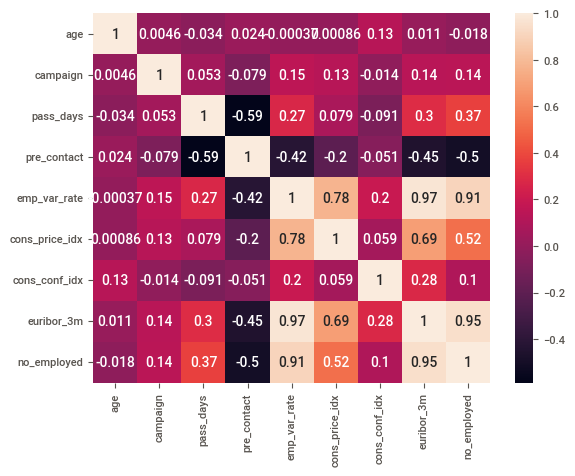

In [21]:
#correlation table
sns.heatmap(data.drop('outcome',axis=1).corr(),annot=True)

### Insights:

* **We performed univariate analysis using sweetviz where we found 25-50 years age group are more interested. We observe a client whose job profession is admin has subscribed more to the bank deposit term. Married people are more interested toward term deposit subscription.** 
*  **We created a countplot for categorical features with respect to target variable ’outcome’.  People who have university degrees are showing more interest and may-august are the month where clients were contacted more by banks.Cellular phone is used more to communicate with the clients. The people with university degree education are the most subscribers to term deposit among all types of educated people.**
* **From statistical summary we analyzed that the bank was targeting clients with a minimum age of 17 years old.**

* **We created a correlation table and heat map of numerical features to see the highly correlated features with threshold 0.9. There are 3 variables which are largely correlated to each other, we are assuming a threshold as 0.9, the value greater than this threshold is assumed to be highly correlated. For instance,  euribor_3m,  nr_employed,  emp_var_rate  all have correlation values greater than threshold value(0.9). We observe our dataset is not balanced looking at the target variable distribution graph.**

# Data Preprocessing :

### Checking of null values/ missing values :

In [22]:
data.isnull().sum() 
# There is no missing values in our data

age               0
job               0
marital           0
education         0
default           0
housing_loan      0
personel_loan     0
contact           0
month             0
day_of_week       0
campaign          0
pass_days         0
pre_contact       0
pre_outcome       0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor_3m        0
no_employed       0
outcome           0
dtype: int64

### Conversion of categorical columns in to numrical columns :

In [23]:
data2.head(1)

,job,marital,education,default,housing_loan,personel_loan,contact,month,day_of_week,pre_outcome,outcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no


In [24]:
categorical_col = []  

for column in data2:    
    if data2[column].dtype == object and len(data[column].unique())<=20: 
        categorical_col.append(column)                                   
        
        print(f"{column} : {data2[column].unique()}")   
        print("======================================================================")

job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital : ['married' 'single' 'divorced' 'unknown']
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default : ['no' 'unknown' 'yes']
housing_loan : ['no' 'yes' 'unknown']
personel_loan : ['no' 'yes' 'unknown']
contact : ['telephone' 'cellular']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
pre_outcome : ['nonexistent' 'failure' 'success']
outcome : ['no' 'yes']


In [25]:
data.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [26]:
data["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [27]:
data.job = data.job.map({'housemaid':9, 'services':4, 'admin.':1, 'blue-collar':2, 'technician':3, 'retired':6,
 'management':5, 'unemployed':10, 'self-employed':8, 'unknown':12, 'entrepreneur':7,
 'student':11})

In [28]:
data["contact"].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [29]:
data.contact=data.contact.map({"cellular":1, "telephone":0})

In [30]:
data.head(4)

,age,job,marital,education,default,housing_loan,personel_loan,contact,month,day_of_week,campaign,pass_days,pre_contact,pre_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,no_employed,outcome
0,56,9,married,basic.4y,no,no,no,0,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,4,married,high.school,unknown,no,no,0,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,4,married,high.school,no,yes,no,0,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,1,married,basic.6y,no,no,no,0,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [31]:
data["marital"].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [32]:
data.marital = data.marital.map({"married":1, "single":2, "divorced":3, "unknown":4})

In [33]:
data["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [34]:
data.education = data.education.map({'basic.4y':5,  'high.school':2, 'basic.6y':6, 'basic.9y':3, 'professional.course':4,
 'unknown':7, 'university.degree':1, 'illiterate':8})

In [35]:
data["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [36]:
data.default = data.default.map({'no':1, 'unknown':2, 'yes':3})

In [37]:
data["housing_loan"].value_counts()

yes        21576
no         18622
unknown      990
Name: housing_loan, dtype: int64

In [38]:
data.housing_loan = data.housing_loan.map({'no':2, 'yes':2, 'unknown':3})

In [39]:
data["personel_loan"].value_counts()

no         33950
yes         6248
unknown      990
Name: personel_loan, dtype: int64

In [40]:
data.personel_loan = data.personel_loan.map({'no':1, 'yes':2, 'unknown':3})

In [41]:
data["month"].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [42]:
data.month = data.month.map({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'mar':3,'apr':4, 'sep':9})

In [43]:
data["day_of_week"].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [44]:
data.day_of_week = data.day_of_week.map({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5})

In [45]:
data["pre_outcome"].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: pre_outcome, dtype: int64

In [46]:
data.pre_outcome = data.pre_outcome.map({'nonexistent':1, 'failure':2, 'success':3})

In [47]:
data

,age,job,marital,education,default,housing_loan,personel_loan,contact,month,day_of_week,campaign,pass_days,pre_contact,pre_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,no_employed,outcome
0,56,9,1,5,1,2,1,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,4,1,2,2,2,1,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,4,1,2,1,2,1,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,1,1,6,1,2,1,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,4,1,2,1,2,2,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,4,1,2,1,1,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,2,1,4,1,2,1,1,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,6,1,1,1,2,1,1,11,5,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,3,1,4,1,2,1,1,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes


In [48]:
data["outcome"].value_counts()

no     36548
yes     4640
Name: outcome, dtype: int64

In [49]:
data.outcome = data.outcome.map({"yes":1, "no":0})

In [50]:
data.head(6)

,age,job,marital,education,default,housing_loan,personel_loan,contact,month,day_of_week,campaign,pass_days,pre_contact,pre_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,no_employed,outcome
0,56,9,1,5,1,2,1,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,4,1,2,2,2,1,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,4,1,2,1,2,1,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,1,6,1,2,1,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,4,1,2,1,2,2,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,45,4,1,3,2,2,1,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


### Checking the outliers :

In [51]:
data3= data[["age","campaign" ]]

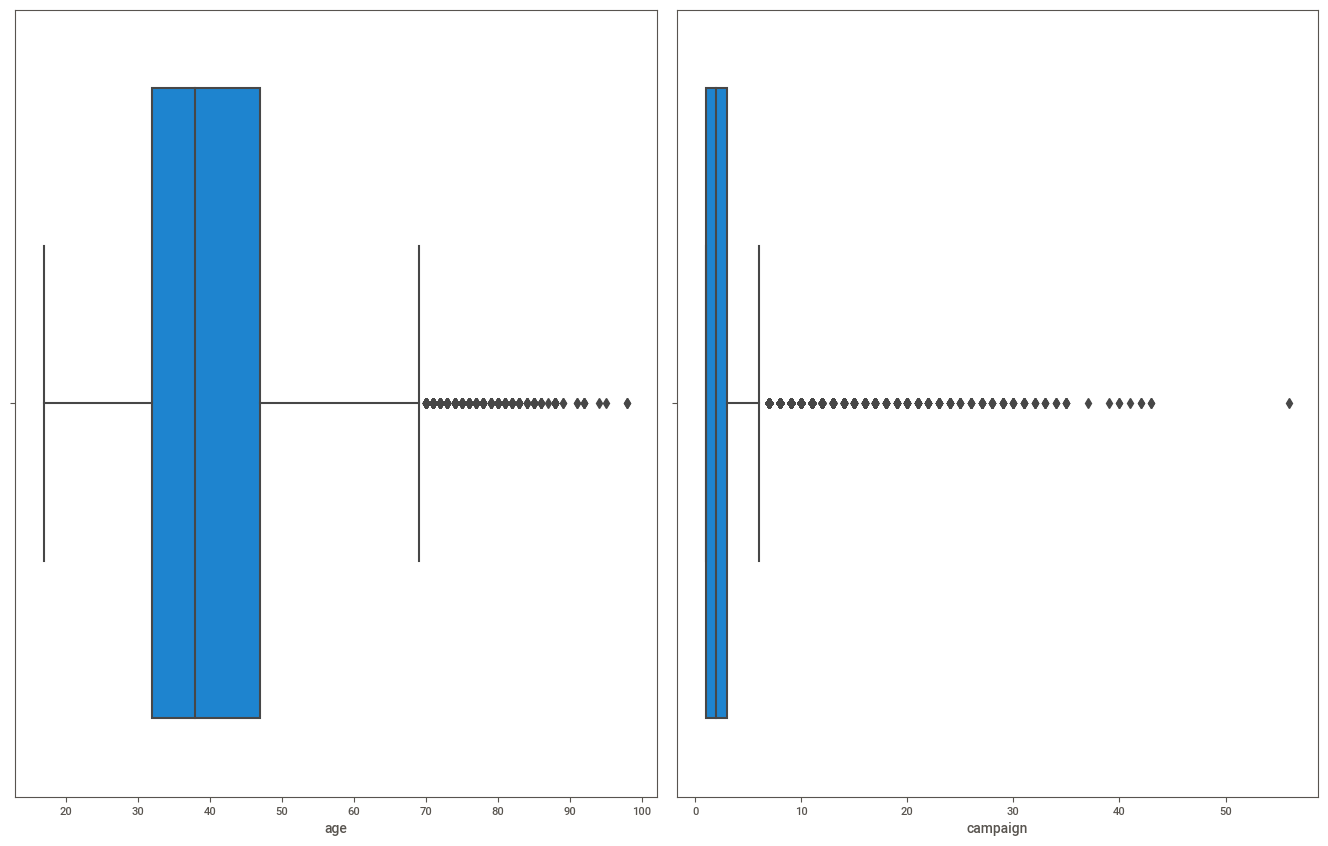

In [52]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in data3:
        plt.subplot(3,3,plotnumber)
        sns.boxplot(data3[column])
        plotnumber+=1
        
plt.tight_layout()  

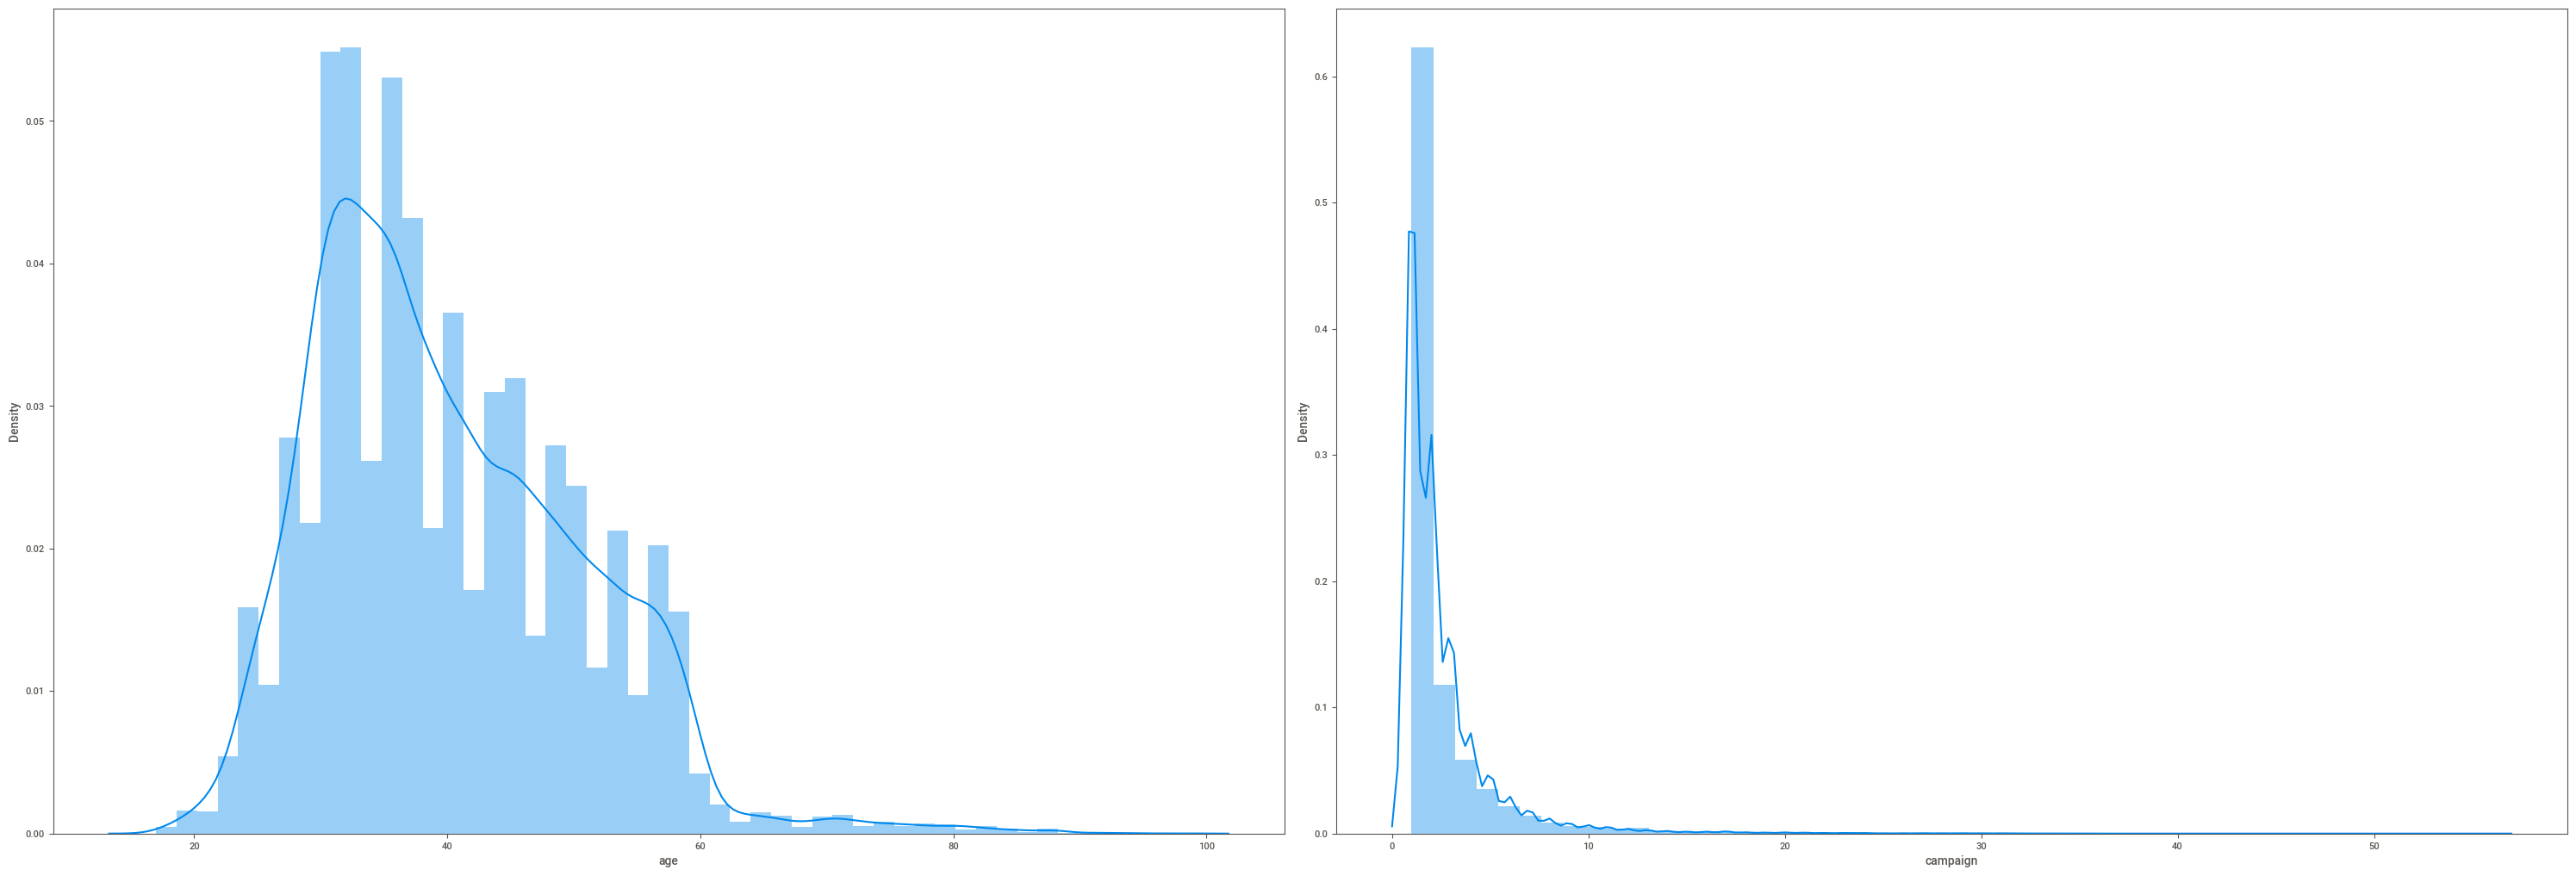

In [53]:
plt.figure(figsize=(30,20))
plotnumber=1
for column in data3:
        plt.subplot(2,2,plotnumber)
        sns.distplot(data3[column])
        plotnumber+=1
        
plt.tight_layout()    

In [54]:
# using IQR to remove the outliers of age
IQR = stats.iqr(data.age, interpolation = 'midpoint') 
IQR

15.0

In [55]:
# First quartile (Q1) 
Q1 = data3.age.quantile(0.25)

# Third quartile (Q3) 
Q3 = data3.age.quantile(0.75)

##getting the limits
min_limit = Q1 - 1.5*IQR

max_limit = Q3 +1.5*IQR

In [56]:
print(min_limit)
print(max_limit)

9.5
69.5


In [57]:
data.loc[data3['age'] > max_limit]

,age,job,marital,education,default,housing_loan,personel_loan,contact,month,day_of_week,campaign,pass_days,pre_contact,pre_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,no_employed,outcome
27713,70,6,3,5,1,2,1,1,3,1,3,999,0,1,-1.8,92.843,-50.0,1.811,5099.1,1
27757,76,6,1,1,1,2,2,1,3,4,9,999,0,1,-1.8,92.843,-50.0,1.757,5099.1,0
27780,73,6,1,1,1,2,1,1,3,2,1,999,1,2,-1.8,92.843,-50.0,1.687,5099.1,0
27800,88,6,3,5,1,2,1,1,3,3,1,999,0,1,-1.8,92.843,-50.0,1.663,5099.1,0
27802,88,6,3,5,1,2,1,1,3,3,2,999,0,1,-1.8,92.843,-50.0,1.663,5099.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,6,3,5,2,2,2,1,10,1,4,3,1,3,-1.1,94.601,-49.5,1.000,4963.6,0
40996,81,6,1,5,1,2,1,1,10,3,1,999,2,2,-1.1,94.601,-49.5,1.016,4963.6,1
41004,80,6,1,4,1,2,1,1,10,4,1,999,1,2,-1.1,94.601,-49.5,1.025,4963.6,1
41183,73,6,1,4,1,2,1,1,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [58]:
data.loc[data3['age'] < min_limit]

,age,job,marital,education,default,housing_loan,personel_loan,contact,month,day_of_week,campaign,pass_days,pre_contact,pre_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,no_employed,outcome


In [59]:
data3.loc[data3['age'] > max_limit,'age']=np.median(data3.age)

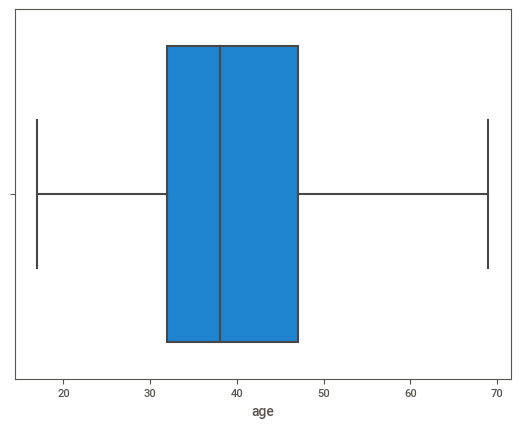

In [60]:
sns.boxplot(data3.age)
plt.show()

In [61]:
# using IQR to remove the outliers of campaign
IQR = stats.iqr(data.campaign, interpolation = 'midpoint') 
IQR

2.0

In [62]:
# First quartile (Q1) 
Q1 = data3.campaign.quantile(0.25)

# Third quartile (Q3) 
Q3 = data3.campaign.quantile(0.75)

##getting the limits
min_limit = Q1 - 1.5*IQR

max_limit = Q3 +1.5*IQR

In [63]:
print(min_limit)
print(max_limit)

-2.0
6.0


In [64]:
data.loc[data3['campaign'] > max_limit]

,age,job,marital,education,default,housing_loan,personel_loan,contact,month,day_of_week,campaign,pass_days,pre_contact,pre_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,no_employed,outcome
887,54,1,1,1,1,2,1,0,5,3,7,999,0,1,1.1,93.994,-36.4,4.856,5191.0,0
1043,41,3,2,1,2,2,1,0,5,3,8,999,0,1,1.1,93.994,-36.4,4.856,5191.0,0
1094,40,3,1,4,1,2,1,0,5,3,8,999,0,1,1.1,93.994,-36.4,4.856,5191.0,0
1097,51,2,1,5,2,2,1,0,5,3,7,999,0,1,1.1,93.994,-36.4,4.856,5191.0,0
1230,48,2,3,5,1,2,1,0,5,4,7,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40611,75,6,1,3,1,2,1,0,9,5,9,999,1,2,-1.1,94.199,-37.5,0.883,4963.6,0
40631,88,6,1,5,1,2,1,1,9,1,7,999,0,1,-1.1,94.199,-37.5,0.882,4963.6,0
40698,29,3,2,4,1,2,1,1,9,1,7,3,5,3,-1.1,94.199,-37.5,0.879,4963.6,0
40821,33,3,2,4,1,2,1,1,9,5,9,999,2,2,-1.1,94.199,-37.5,0.879,4963.6,0


In [65]:
data.loc[data3['campaign'] < min_limit]

,age,job,marital,education,default,housing_loan,personel_loan,contact,month,day_of_week,campaign,pass_days,pre_contact,pre_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,no_employed,outcome


In [66]:
data3.loc[data3['campaign'] > max_limit,'campaign']=np.median(data3.campaign)

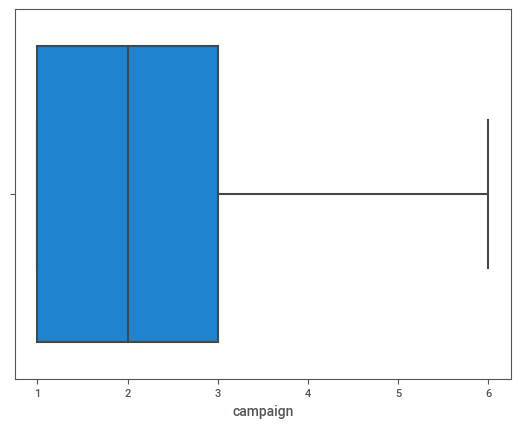

In [67]:
sns.boxplot(data3.campaign)
plt.show()

# Feature Selection :

In [68]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing_loan',
       'personel_loan', 'contact', 'month', 'day_of_week', 'campaign',
       'pass_days', 'pre_contact', 'pre_outcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor_3m', 'no_employed',
       'outcome'],
      dtype='object')

In [69]:
# we remove output only
f_data = data[['age', 'job', 'marital', 'education', 'default', 'housing_loan',
       'personel_loan', 'contact', 'month', 'day_of_week',
       'campaign', 'pass_days', 'pre_contact', 'pre_outcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor_3m', 'no_employed']]

<AxesSubplot:>

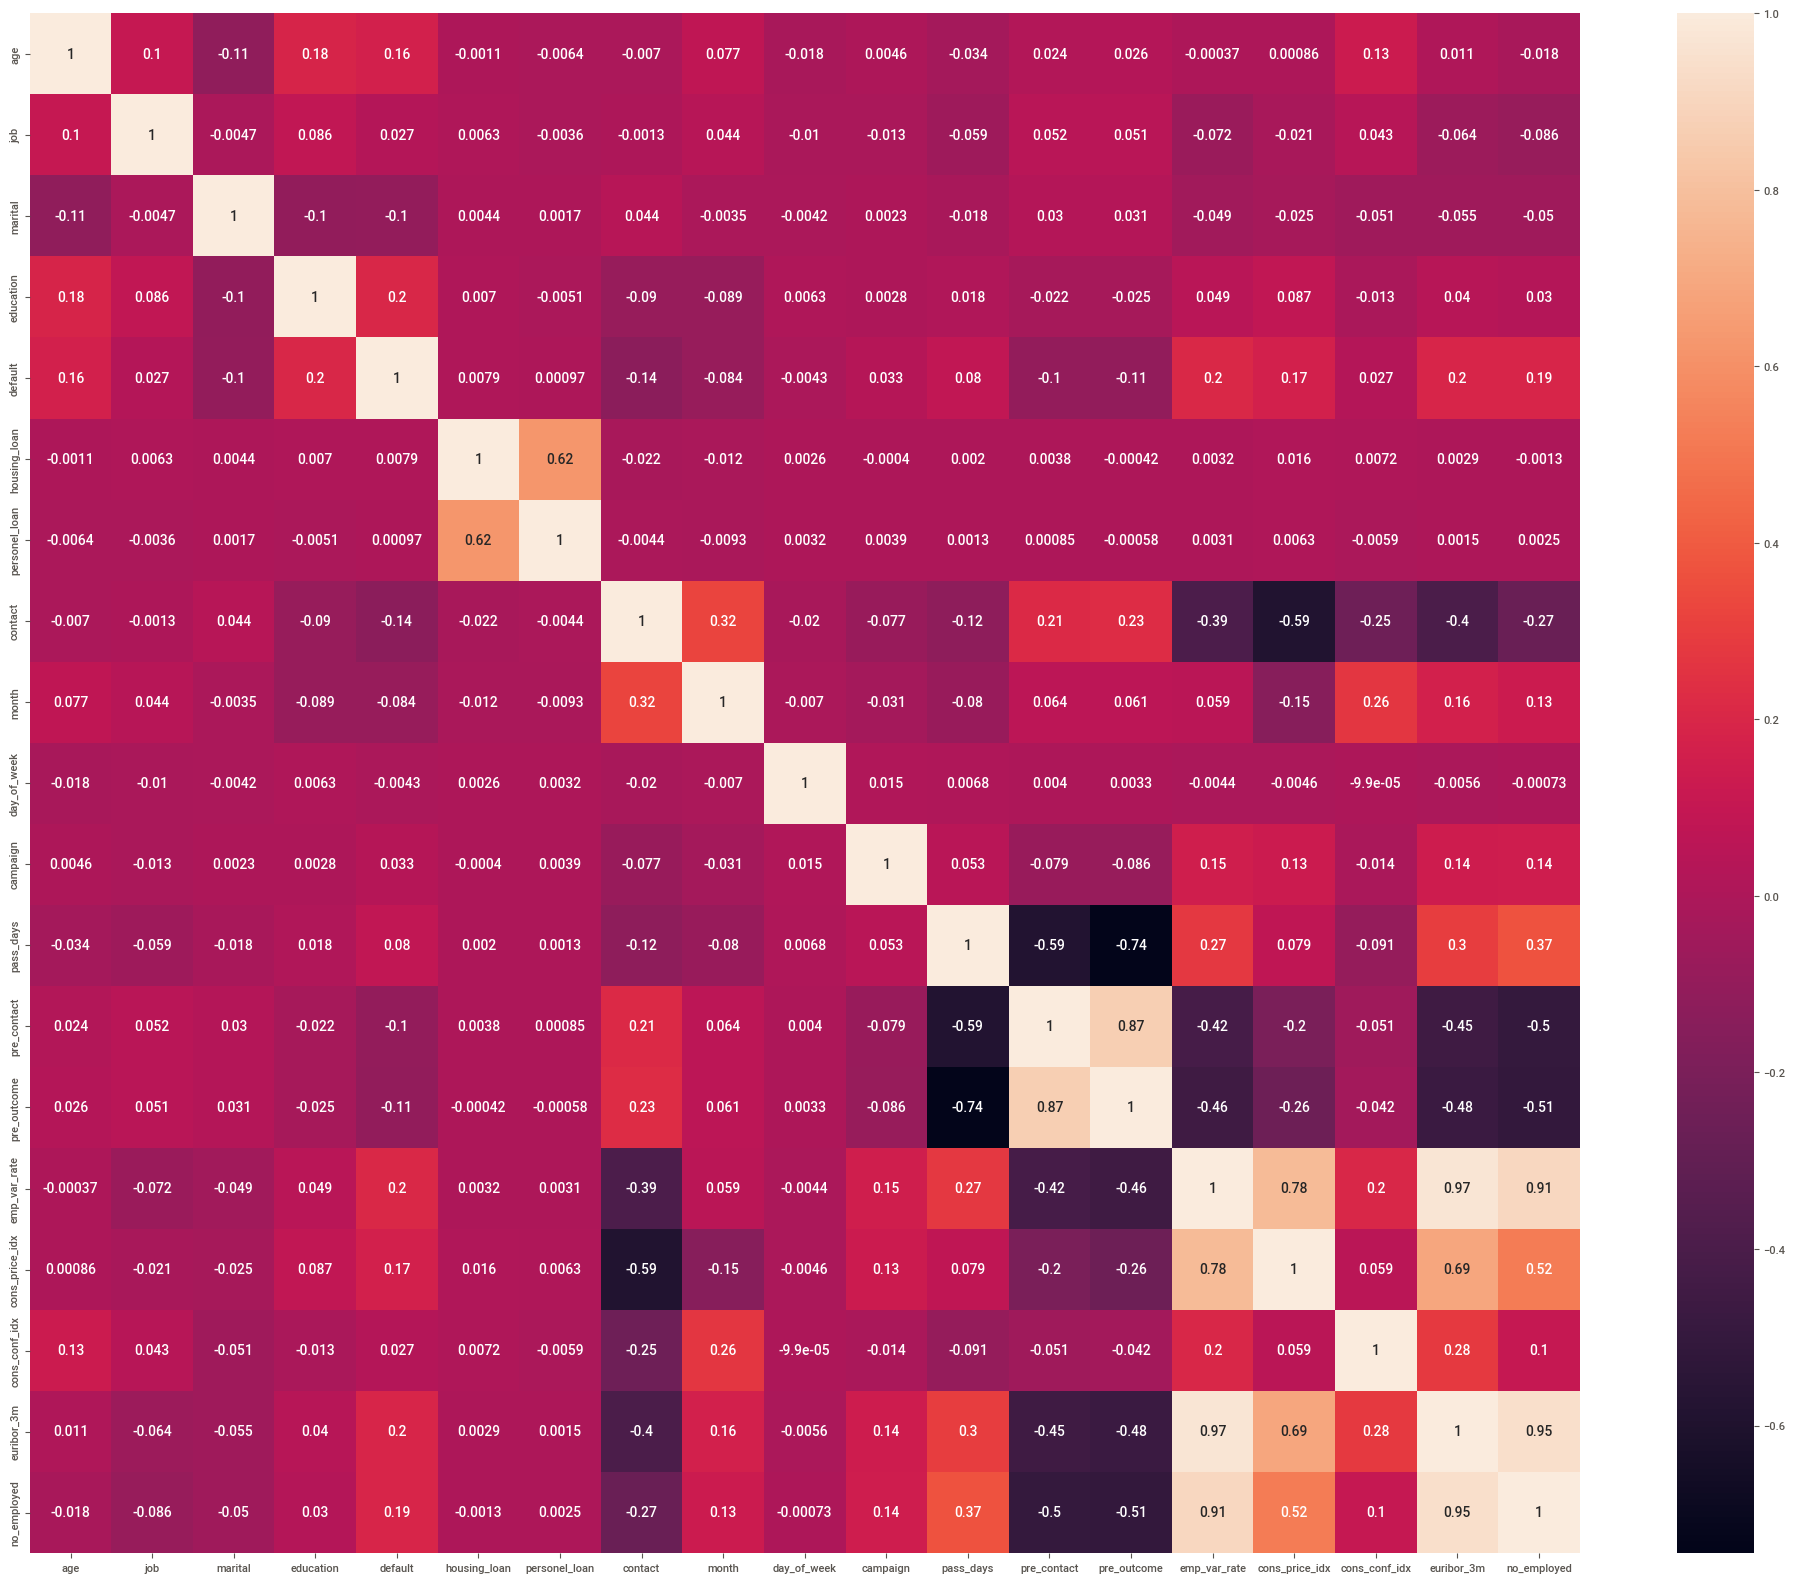

In [70]:
plt.figure(figsize=(25,20))
sns.heatmap(f_data.corr(),annot=True)

In [71]:
f_data

,age,job,marital,education,default,housing_loan,personel_loan,contact,month,day_of_week,campaign,pass_days,pre_contact,pre_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,no_employed
0,56,9,1,5,1,2,1,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,4,1,2,2,2,1,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,4,1,2,1,2,1,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,1,1,6,1,2,1,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,4,1,2,1,2,2,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,4,1,2,1,1,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,2,1,4,1,2,1,1,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,6,1,1,1,2,1,1,11,5,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,3,1,4,1,2,1,1,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


* **There is co-relation between "emp_var_rate", "no_employed",  "euribor_3m", "pre_outcome", "pre_contact"**
* **So we select only relevent features**

In [72]:
data.head(pd.set_option("display.max_columns",None))

,age,job,marital,education,default,housing_loan,personel_loan,contact,month,day_of_week,campaign,pass_days,pre_contact,pre_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,no_employed,outcome
0,56,9,1,5,1,2,1,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,4,1,2,2,2,1,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,4,1,2,1,2,1,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,1,6,1,2,1,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,4,1,2,1,2,2,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,4,1,2,1,1,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,2,1,4,1,2,1,1,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,6,1,1,1,2,1,1,11,5,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,3,1,4,1,2,1,1,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [73]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing_loan',
       'personel_loan', 'contact', 'month', 'day_of_week', 'campaign',
       'pass_days', 'pre_contact', 'pre_outcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor_3m', 'no_employed',
       'outcome'],
      dtype='object')

In [74]:
data["pre_outcome"].value_counts() 

1    35563
2     4252
3     1373
Name: pre_outcome, dtype: int64

In [75]:
data["cons_conf_idx"].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons_conf_idx, dtype: int64

In [76]:
data["cons_price_idx"].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons_price_idx, dtype: int64

In [77]:
data["euribor_3m"].value_counts()

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
3.853       1
3.901       1
0.969       1
0.956       1
3.669       1
Name: euribor_3m, Length: 316, dtype: int64

In [78]:
data["emp_var_rate"].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp_var_rate, dtype: int64

In [79]:
data["no_employed"].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: no_employed, dtype: int64

In [80]:
data["day_of_week"].value_counts()

4    8623
1    8514
3    8134
2    8090
5    7827
Name: day_of_week, dtype: int64

In [81]:
data["pass_days"].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pass_days, dtype: int64

In [82]:
final_data = data [ [ 'age', 'job', 'marital', 'education', 'default', 'housing_loan',
       'personel_loan', 'contact', 'month', 'day_of_week', 'campaign',
       'pass_days', 'pre_contact', 'pre_outcome',
       'cons_price_idx', 'cons_conf_idx', 'euribor_3m' ] ]

In [83]:
final_data

,age,job,marital,education,default,housing_loan,personel_loan,contact,month,day_of_week,campaign,pass_days,pre_contact,pre_outcome,cons_price_idx,cons_conf_idx,euribor_3m
0,56,9,1,5,1,2,1,0,5,1,1,999,0,1,93.994,-36.4,4.857
1,57,4,1,2,2,2,1,0,5,1,1,999,0,1,93.994,-36.4,4.857
2,37,4,1,2,1,2,1,0,5,1,1,999,0,1,93.994,-36.4,4.857
3,40,1,1,6,1,2,1,0,5,1,1,999,0,1,93.994,-36.4,4.857
4,56,4,1,2,1,2,2,0,5,1,1,999,0,1,93.994,-36.4,4.857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,4,1,2,1,1,11,5,1,999,0,1,94.767,-50.8,1.028
41184,46,2,1,4,1,2,1,1,11,5,1,999,0,1,94.767,-50.8,1.028
41185,56,6,1,1,1,2,1,1,11,5,2,999,0,1,94.767,-50.8,1.028
41186,44,3,1,4,1,2,1,1,11,5,1,999,0,1,94.767,-50.8,1.028


#### We will scale our numerical data that can help to improve the performance of the model and make it more interpretable. Using StandardScaler() function from sklearn we can scale some numerical data columns.

In [84]:
from sklearn.preprocessing import StandardScaler

scaler   = StandardScaler()
num_cols = ["age", "campaign","pass_days", "pre_contact", "cons_conf_idx", "euribor_3m"]
final_data[num_cols] = scaler.fit_transform(final_data[num_cols])

In [85]:
# input variables
final_data.head()

,age,job,marital,education,default,housing_loan,personel_loan,contact,month,day_of_week,campaign,pass_days,pre_contact,pre_outcome,cons_price_idx,cons_conf_idx,euribor_3m
0,1.533034,9,1,5,1,2,1,0,5,1,-0.565922,0.195414,-0.349494,1,93.994,0.886447,0.71246
1,1.628993,4,1,2,2,2,1,0,5,1,-0.565922,0.195414,-0.349494,1,93.994,0.886447,0.71246
2,-0.290186,4,1,2,1,2,1,0,5,1,-0.565922,0.195414,-0.349494,1,93.994,0.886447,0.71246
3,-0.002309,1,1,6,1,2,1,0,5,1,-0.565922,0.195414,-0.349494,1,93.994,0.886447,0.71246
4,1.533034,4,1,2,1,2,2,0,5,1,-0.565922,0.195414,-0.349494,1,93.994,0.886447,0.71246


In [86]:
# target variable
data.outcome 

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: outcome, Length: 41188, dtype: int64

In [87]:
# Creating independent and dependent variable.

X = final_data
y = data.outcome

In [88]:
X

,age,job,marital,education,default,housing_loan,personel_loan,contact,month,day_of_week,campaign,pass_days,pre_contact,pre_outcome,cons_price_idx,cons_conf_idx,euribor_3m
0,1.533034,9,1,5,1,2,1,0,5,1,-0.565922,0.195414,-0.349494,1,93.994,0.886447,0.712460
1,1.628993,4,1,2,2,2,1,0,5,1,-0.565922,0.195414,-0.349494,1,93.994,0.886447,0.712460
2,-0.290186,4,1,2,1,2,1,0,5,1,-0.565922,0.195414,-0.349494,1,93.994,0.886447,0.712460
3,-0.002309,1,1,6,1,2,1,0,5,1,-0.565922,0.195414,-0.349494,1,93.994,0.886447,0.712460
4,1.533034,4,1,2,1,2,2,0,5,1,-0.565922,0.195414,-0.349494,1,93.994,0.886447,0.712460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,6,1,4,1,2,1,1,11,5,-0.565922,0.195414,-0.349494,1,94.767,-2.224953,-1.495186
41184,0.573445,2,1,4,1,2,1,1,11,5,-0.565922,0.195414,-0.349494,1,94.767,-2.224953,-1.495186
41185,1.533034,6,1,1,1,2,1,1,11,5,-0.204909,0.195414,-0.349494,1,94.767,-2.224953,-1.495186
41186,0.381527,3,1,4,1,2,1,1,11,5,-0.565922,0.195414,-0.349494,1,94.767,-2.224953,-1.495186


In [89]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: outcome, Length: 41188, dtype: int64

In [90]:
data["outcome"].value_counts()  # its not balanced,so we have to balance our y

0    36548
1     4640
Name: outcome, dtype: int64

In [91]:
## Balancing the data

import imblearn                          
from collections import Counter           
from imblearn.over_sampling import SMOTE 

sm=SMOTE()                         
X_sm,y_sm = sm.fit_resample(X,y)   

print(Counter(y))                
print(Counter(y_sm))      

Counter({0: 36548, 1: 4640})
Counter({0: 36548, 1: 36548})


In [92]:
# Spliting data to training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

In [93]:
X_train

,age,job,marital,education,default,housing_loan,personel_loan,contact,month,day_of_week,campaign,pass_days,pre_contact,pre_outcome,cons_price_idx,cons_conf_idx,euribor_3m
28033,0.189609,3,3,4,1,2,2,1,4,4,-0.565922,0.195414,-0.349494,1,93.075000,-1.425496,-1.232852
2440,-0.769980,1,3,2,1,2,1,0,5,2,-0.565922,0.195414,-0.349494,1,93.994000,0.886447,0.711883
21533,-0.961898,3,2,2,1,2,1,1,8,2,3.766239,0.195414,-0.349494,1,93.444000,0.951267,0.773575
27905,-0.386145,5,1,1,1,2,2,1,3,4,-0.565922,0.195414,-0.349494,1,92.843000,-2.052098,-1.201141
15017,-0.482104,7,2,1,1,2,1,1,7,4,-0.565922,0.195414,-0.349494,1,93.918000,-0.474791,0.770692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,1.724952,10,3,4,1,2,2,1,8,4,-0.565922,0.195414,-0.349494,1,92.201000,1.966794,-1.578788
6265,1.724952,6,1,4,2,2,1,0,5,2,-0.204909,0.195414,-0.349494,1,93.994000,0.886447,0.712460
54886,-1.178870,11,2,6,1,2,1,1,3,2,-0.321037,-5.104921,1.671136,3,93.454921,1.241929,-1.719709
860,-0.002309,5,1,1,1,2,1,0,5,3,-0.204909,0.195414,-0.349494,1,93.994000,0.886447,0.711883


In [94]:
y_train

28033    0
2440     0
21533    0
27905    0
15017    0
        ..
37194    0
6265     0
54886    1
860      0
15795    0
Name: outcome, Length: 54822, dtype: int64

### Model creaion using decision tree:

In [95]:
from sklearn.tree import DecisionTreeClassifier  

dtc = DecisionTreeClassifier()                      
dtc.fit(X_train,y_train)                        
y_hat = dtc.predict(X_test)                         
y_hat 

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [96]:
y_train_predict = dtc.predict(X_train)  #predicting training data to check training performance 
y_train_predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [97]:
# Model evaluation

from sklearn import metrics

def evaluate_model(model, x_test, y_test):  #we create user define function
    
    y_pred = model.predict(x_test) 

    # Calculate accuracy, precision, recall, f1-score
    acc  = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec  = metrics.recall_score(y_test, y_pred)
    f1   = metrics.f1_score(y_test, y_pred)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'cm': cm}

In [98]:
# Decision Tree Evaluation:

dtc_eval = evaluate_model(dtc, X_test, y_test)

print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Confusion Matrix : \n' , dtc_eval['cm'])

Accuracy: 0.8918682280836161
Precision: 0.8821133854892295
Recall: 0.9038102558471506
F1 Score: 0.8928300249484761
Confusion Matrix : 
 [[8067 1100]
 [ 876 8231]]


### Model creation using random forest :

In [99]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [100]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.9257962131990807
Precision: 0.9275234418091561
Recall: 0.9232458548369387
F1 Score: 0.925379705040722
Confusion Matrix:
 [[8510  657]
 [ 699 8408]]


### Model creation using XG Boost :

In [101]:
import xgboost
from xgboost import XGBClassifier

xgc=XGBClassifier()
xgc.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [102]:
# Evaluate Model
xgc_eval = evaluate_model(xgc, X_test, y_test)

print('Accuracy:', xgc_eval['acc'])
print('Precision:', xgc_eval['prec'])
print('Recall:', xgc_eval['rec'])
print('F1 Score:', xgc_eval['f1'])
print('Confusion Matrix:\n', xgc_eval['cm'])

Accuracy: 0.9317609718726059
Precision: 0.9549664274137531
Recall: 0.9057867574393323
F1 Score: 0.9297266835728374
Confusion Matrix:
 [[8778  389]
 [ 858 8249]]


### Model creation using naive_bayes :

In [103]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [104]:
# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.7212432964868118
Precision: 0.749844353131615
Recall: 0.661249588228835
F1 Score: 0.7027657836386976
Confusion Matrix:
 [[7158 2009]
 [3085 6022]]


### Model creation using Logistic regression :

In [105]:
from sklearn.linear_model import LogisticRegression   
lr = LogisticRegression()     
lr.fit(X_train,y_train) 

LogisticRegression()

In [106]:
y_predict = lr.predict(X_test)
y_predict 

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [107]:
# Logistic Regression Evaluation:

lr_eval = evaluate_model(lr, X_test, y_test)

print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Confusion Matrix : \n' , lr_eval['cm'])

Accuracy: 0.7265513844806829
Precision: 0.7466394623139703
Recall: 0.6831009113868453
F1 Score: 0.7134583405011756
Confusion Matrix : 
 [[7056 2111]
 [2886 6221]]


### Model creation using KNN :

In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [110]:
# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

print('Accuracy:',  knn_eval['acc'])
print('F1 Score:',  knn_eval['f1']) 
print('Precision:', knn_eval['prec'])
print('Recall:',    knn_eval['rec'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.8315639706687097
F1 Score: 0.8441361150496253
Precision: 0.783291044074805
Recall: 0.9152300428242012
Confusion Matrix:
 [[6861 2306]
 [ 772 8335]]


### Model creation using SVM :

In [111]:
from sklearn.svm import SVC
svc = SVC() 
svc.fit(X_train, y_train)

SVC()

In [112]:
# Evaluate Model
svc_eval = evaluate_model(svc, X_test, y_test)

print('Accuracy:', svc_eval['acc'])
print('Precision:', svc_eval['prec'])
print('Recall:', svc_eval['rec'])
print('F1 Score:', svc_eval['f1'])
print('Confusion Matrix:\n', svc_eval['cm'])

Accuracy: 0.7099157272627777
Precision: 0.7109756097560975
Recall: 0.7041835950367848
F1 Score: 0.7075633033596292
Confusion Matrix:
 [[6560 2607]
 [2694 6413]]


### Models comparison :

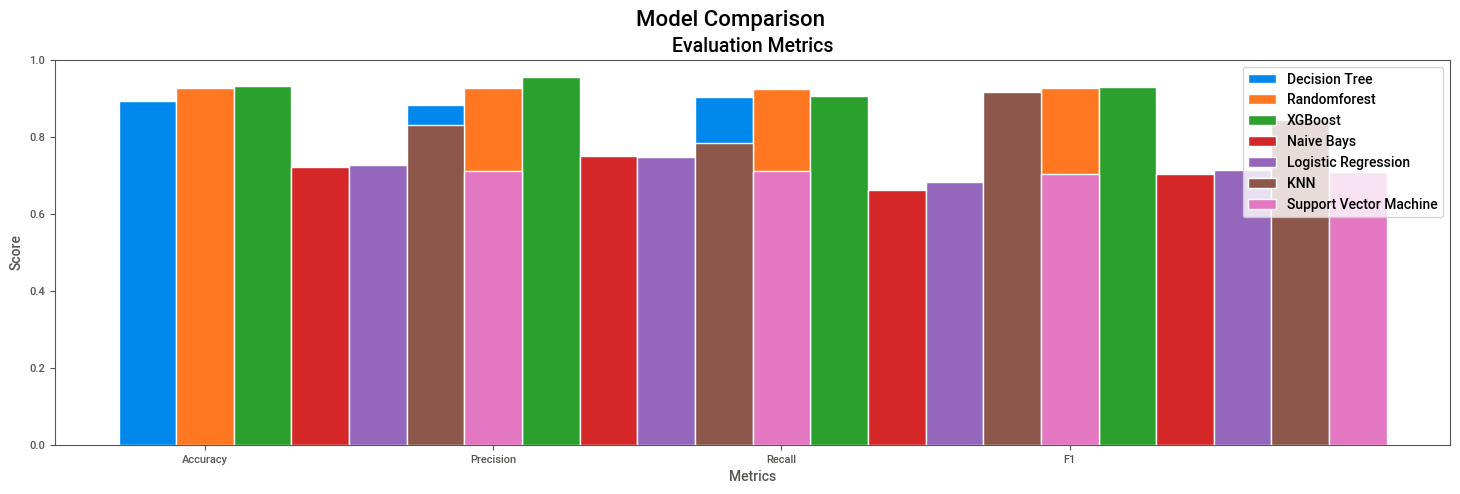

In [113]:
# figure initialisation
#plt.figure(figsize=(20,40))
fig,(ax1) = plt.subplots(1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(5)
fig.set_figwidth(18)
fig.set_facecolor('white')

# set bar size

barWidth  = 0.2

dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1']]

rf_score  = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1']]

xgc_score = [xgc_eval['acc'], xgc_eval['prec'], xgc_eval['rec'], xgc_eval['f1']]

nb_score  = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1']]

lr_score  = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1']]

knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1']]

svc_score = [svc_eval['acc'], svc_eval['prec'], svc_eval['rec'], svc_eval['f1']]




# Set position of bar on X axis

r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]

## Make the plot

ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white',  label = 'Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label   = 'Randomforest')
ax1.bar(r3, xgc_score, width=barWidth, edgecolor='white',  label = 'XGBoost')
ax1.bar(r4, nb_score, width=barWidth, edgecolor='white', label   = 'Naive Bays')
ax1.bar(r5, lr_score, width=barWidth, edgecolor='white', label   = 'Logistic Regression')
ax1.bar(r6, knn_score, width=barWidth, edgecolor='white', label  = 'KNN')
ax1.bar(r7, svc_score, width=barWidth, edgecolor='white', label  = 'Support Vector Machine')


## Configure x and y axis

ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()


plt.show()

* **From the above comparison we can see that our Random Forest model and XG Boosting tops the other models.** 
* **So we can optimise both Random Forest and XG Boostis and getting best fit model.**

## Random Forest Model Optimisation (hyper-parameter tuning) :

##### We optimise our RandomForest model by tuning the hyper parameters. After finding the optimal parameters we will then evaluate our new model by comparing it against our base line model before.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)] 
max_features = ['auto', 'sqrt'] 
max_depth    = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]  
min_samples_leaf  = [1, 2, 4]   
bootstrap = [True, False]        

In [ ]:
#dictionary for hyperparameters

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [ ]:
rf_clf1 = RandomForestClassifier(random_state=42) 

rf_cv   = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [ ]:
rf_cv.fit(X_train, y_train)               

rf_best_params = rf_cv.best_params_        

print(f"Best paramters: {rf_best_params})")  

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
rf_clf2   = RandomForestClassifier(n_estimators = 400, min_samples_split = 2, min_samples_leaf = 1, 
                                   max_features = 'auto', max_depth= None )

rf_clf2.fit(X_train, y_train)                    
y_predict = rf_clf2.predict(X_test) 
f1_score  = f1_score(y_test,y_predict) 

In [ ]:
f1_score

In [ ]:
print(classification_report(y_test,y_predict))

## XGBoosting optimisation (Hyperparameter tunning)
##### we will try to optimise our XGBoost model by tuning the hyper parameters. After finding the optimal parameters we will then evaluate our new model by comparing it against our base line model before.

In [120]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)

rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions = param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                        
rcv.fit(X_train, y_train)
cv_best_params = rcv.best_params_
print(f"Best paramters: {cv_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 0.2, 'reg_alpha': 0.2, 'n_estimators': 150, 'max_depth': 12, 'learning_rate': 0.25, 'gamma': 0.8})


In [123]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score,classification_report,f1_score
XGB2=XGBClassifier(reg_lambda= 12.8, reg_alpha= 0.1, n_estimators=150, max_depth=5, learning_rate=0.1, gamma=0.8)
XGB2.fit(X_train, y_train) 
y_predict = XGB2.predict(X_test)
recall = recall_score(y_predict, y_test,)
f1_score = f1_score(y_predict, y_test)

In [125]:
recall

0.9279616419132265

In [124]:
f1_score

0.8987427794767245

In [128]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      9167
           1       0.93      0.87      0.90      9107

    accuracy                           0.90     18274
   macro avg       0.90      0.90      0.90     18274
weighted avg       0.90      0.90      0.90     18274



## Model Comparison :
* We performed multiple models for classification of outcome(y), these classifiers are **Decision_Tree, Random_Forest, Naive_Bayes, XG_Boost, Logistic_Regression, KNN, Support_Vector**  and all are to be compared by the use of precision, recall, f1-score, confusion matrix and based on that the **RandomForest** classifier came out on top with a score of around **0.93**.
* Created a table stating the performance of multiple models on this data and suggest the best model for production.

In [129]:
column_labels = ['Classifier','Accuracy','Recall','Precision','F1-score']

# Decision tree 
df1= pd.DataFrame([[ 'DecisionTree',  dtc_eval['acc'], dtc_eval['rec'], dtc_eval['prec'], dtc_eval['f1'] ]], columns = column_labels )
                 
# Random forest
df2 = pd.DataFrame([[ 'RandomForest', rf_eval['acc'], rf_eval['rec'], rf_eval['prec'], rf_eval['f1'] ]] , columns = column_labels )

# XGBoosting 
df3 = pd.DataFrame([[ 'XGBoosting',   xgc_eval['acc'], xgc_eval['rec'], xgc_eval['prec'] , xgc_eval['f1'] ]],columns =column_labels )

# Naive bayes 
df4 = pd.DataFrame([[ 'GuassianNB',   nb_eval['acc'], nb_eval['rec'], nb_eval['prec'], nb_eval['f1'] ]], columns = column_labels )


# logistic regression 
df5 = pd.DataFrame([[ 'LogisticRegression', lr_eval['acc'], lr_eval['rec'], lr_eval['prec'], lr_eval['f1'] ]], columns = column_labels )


# KNN 
df6 = pd.DataFrame([[ 'KNN', knn_eval['acc'],  knn_eval['rec'], knn_eval['prec'], knn_eval['f1'] ]], columns = column_labels )

# SVM 
df7 = pd.DataFrame([[ 'SupportVectorMachine',  svc_eval['acc'], svc_eval['rec'], svc_eval['prec'], svc_eval['f1'] ]], columns = column_labels )



In [130]:
combined_data= pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=0)
combined_data

,Classifier,Accuracy,Recall,Precision,F1-score
0,DecisionTree,0.891868,0.903810,0.882113,0.892830
0,RandomForest,0.925796,0.923246,0.927523,0.925380
0,XGBoosting,0.931761,0.905787,0.954966,0.929727
0,GuassianNB,0.721243,0.661250,0.749844,0.702766
0,LogisticRegression,0.726551,0.683101,0.746639,0.713458
0,KNN,0.831564,0.915230,0.783291,0.844136
0,SupportVectorMachine,0.709916,0.704184,0.710976,0.707563


#### After optimising top two model i.e. Random Forest classifier and XG Boost  the Random Forest Classifier model classification report  slightly increased.
#### After cpmparing both model we can say that Random Forest is best fit model for this dataset. 

## Conclusion :

* The main goal of this project was to be able to predict which customers would subscribe to a term deposit for Bank Of Portugal. The project uses data collected by the Bank of Portugal that includes customers profiles of those who have subscribed to term deposits and the ones who did not subscribe to a term deposit.

* We were able to analyse the bank marketing dataset, we built different models which helpus to analyse the dataset properly, we classify the dataset according to the data preparing description. We showed various plots for easy reading and understanding.
* According to previous analysis, a target customer profile can be established. The most responsive customers possess feature like age, job, marital status, education etc.

* After the EDA, the dataset was preprocessed by using converting categorical variables,removing outliers, scaling some numerical columns.

* Performed models are decision tree, random forest, naive bayes, xgboost, logistic regression, knn, support vector  classifiers to be compared by the use of precision, recall, f1-score,confusion matrix and based on that the **RandomForest** classifier came out on top with a score of around **0.93**.

## Challenges faced :

### There are some of challenges that as a team we face are :
#### 1. Poor Quality of Data
* Data plays a significant role in the ML process. One of the significant issues our team face is the absence of good quality data. Unclean and noisy data can make the whole process extremely exhausting. We don’t want our algorithm to make inaccurate or faulty predictions. Hence the quality of data is essential to enhance the output. Therefore, we need to ensure that the process of data preprocessing which includes removing outliers, filtering missing values, and removing unwanted features, is done with perfection.  

#### 2. Underfitting of Training Data
* This process occurs when data is unable to establish an accurate relationship between input and output variables.It signifies the data is too simple to establish a precise relationship.
* To overcome this issue: Maximize the training time,add more features to the data, increasing the training time of model.

#### 3. Overfitting of Training Data
* Overfitting refers to ML model trained with a massive amount of data that negatively affect its performance.
* We can tackle this issue by:
Analyzing the data with perfection, remove outliers in the training set, remove unwanted feature like duration.

#### 4. Slow optimisation process
* This is one of the common issues faced at the time of model optimisation. The machine learning models are highly efficient in providing accurate results, but it takes a tremendous amount of time. We optimised two model one is Random Forest and another is XG Boost.Random Forest takes more time than XG Boost.
